# 다항 분포

베르누이 시도를 여러번 하여 얻은 총 성공 횟수 합이 이항 분포를 이루는 것처럼 독립적인 카테고리 분포를 여러번 시도하여 얻은 각 원소의 성공횟수 값은 **다항 분포(Multinomial distribution)**가 된다.

다항 분포는 카테고리 시도를 $N$번 반복하여 $k\;(k=1,\ldots,K)$가 각각 $x_k$번 나올 확률분포 즉, 표본값이 벡터 $x = (x_1, \cdots, x_K)$가 되는 확률분포를 말한다. 
예를 들어 $x = (1, 2, 1, 2, 3, 1)$은 6개의 숫자가 나올 수 있는 주사위를 10번 던져서 1인 면이 1번, 2인 면이 2번, 3인 면이 1번, 4인 면이 2번, 5인 면이 3 번, 6인 면이 1번 나왔다는 뜻이다.

다항 분포의 확률질량함수는 $\text{Mu}(x;N,\mu) $와 같이 표기하며 다음과 같은 수식을 따른다.

$$ \text{Mu}(x;N,\mu) = \binom N x  \prod_{k=1}^K \mu_k^{x_k} = \binom N {x_1, \cdots, x_K} \prod_{k=1}^K \mu_k^{x_k} $$

이 식에서 조합 기호는 다음과 같이 정의된다.

$$ \binom N {x_1, \cdots, x_K} = \dfrac{N!}{x_1! \cdots x_K!} $$

#### 연습 문제 8.2.7

$K=2$인 다항 분포의 확률질량함수가 이항 확률분포의 확률질량함수와 같음을 보여라.

## 다항 분포의 모멘트

다항 분포의 기댓값과 분산은 다음과 같다.

* 기댓값
$$\text{E}[x_k] = N\mu_k$$

* 분산
$$\text{Var}[x_k] = N\mu_k(1-\mu_k)$$

## SciPy를 이용한 다항 분포의 시뮬레이션

SciPy는 다항 분포를 위한 `multinomial` 클래스를 지원한다. 인수로는 시행 횟수 $N$과 모수 벡터 $\mu$를 받는다. 이 시뮬레이션은 5와 6이 다른 수보다 잘 나오게 만든 조작된 주사위를 30번 던졌을 때 나올 수 있는 여러가지 경우를 살펴본 것이다.

In [1]:
N = 30
mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = sp.stats.multinomial(N, mu)

시뮬레이션 결과는 $K$개의 박스 플롯(box plot)으로 표시할 수 있다.

In [2]:
np.random.seed(0)
X = rv.rvs(100)
X[:5]

array([[ 3,  4,  3,  3,  8,  9],
       [ 3,  3,  5,  6,  6,  7],
       [ 4,  3,  3,  5,  5, 10],
       [ 1,  0,  5,  5, 12,  7],
       [ 7,  4,  2,  3,  5,  9]])

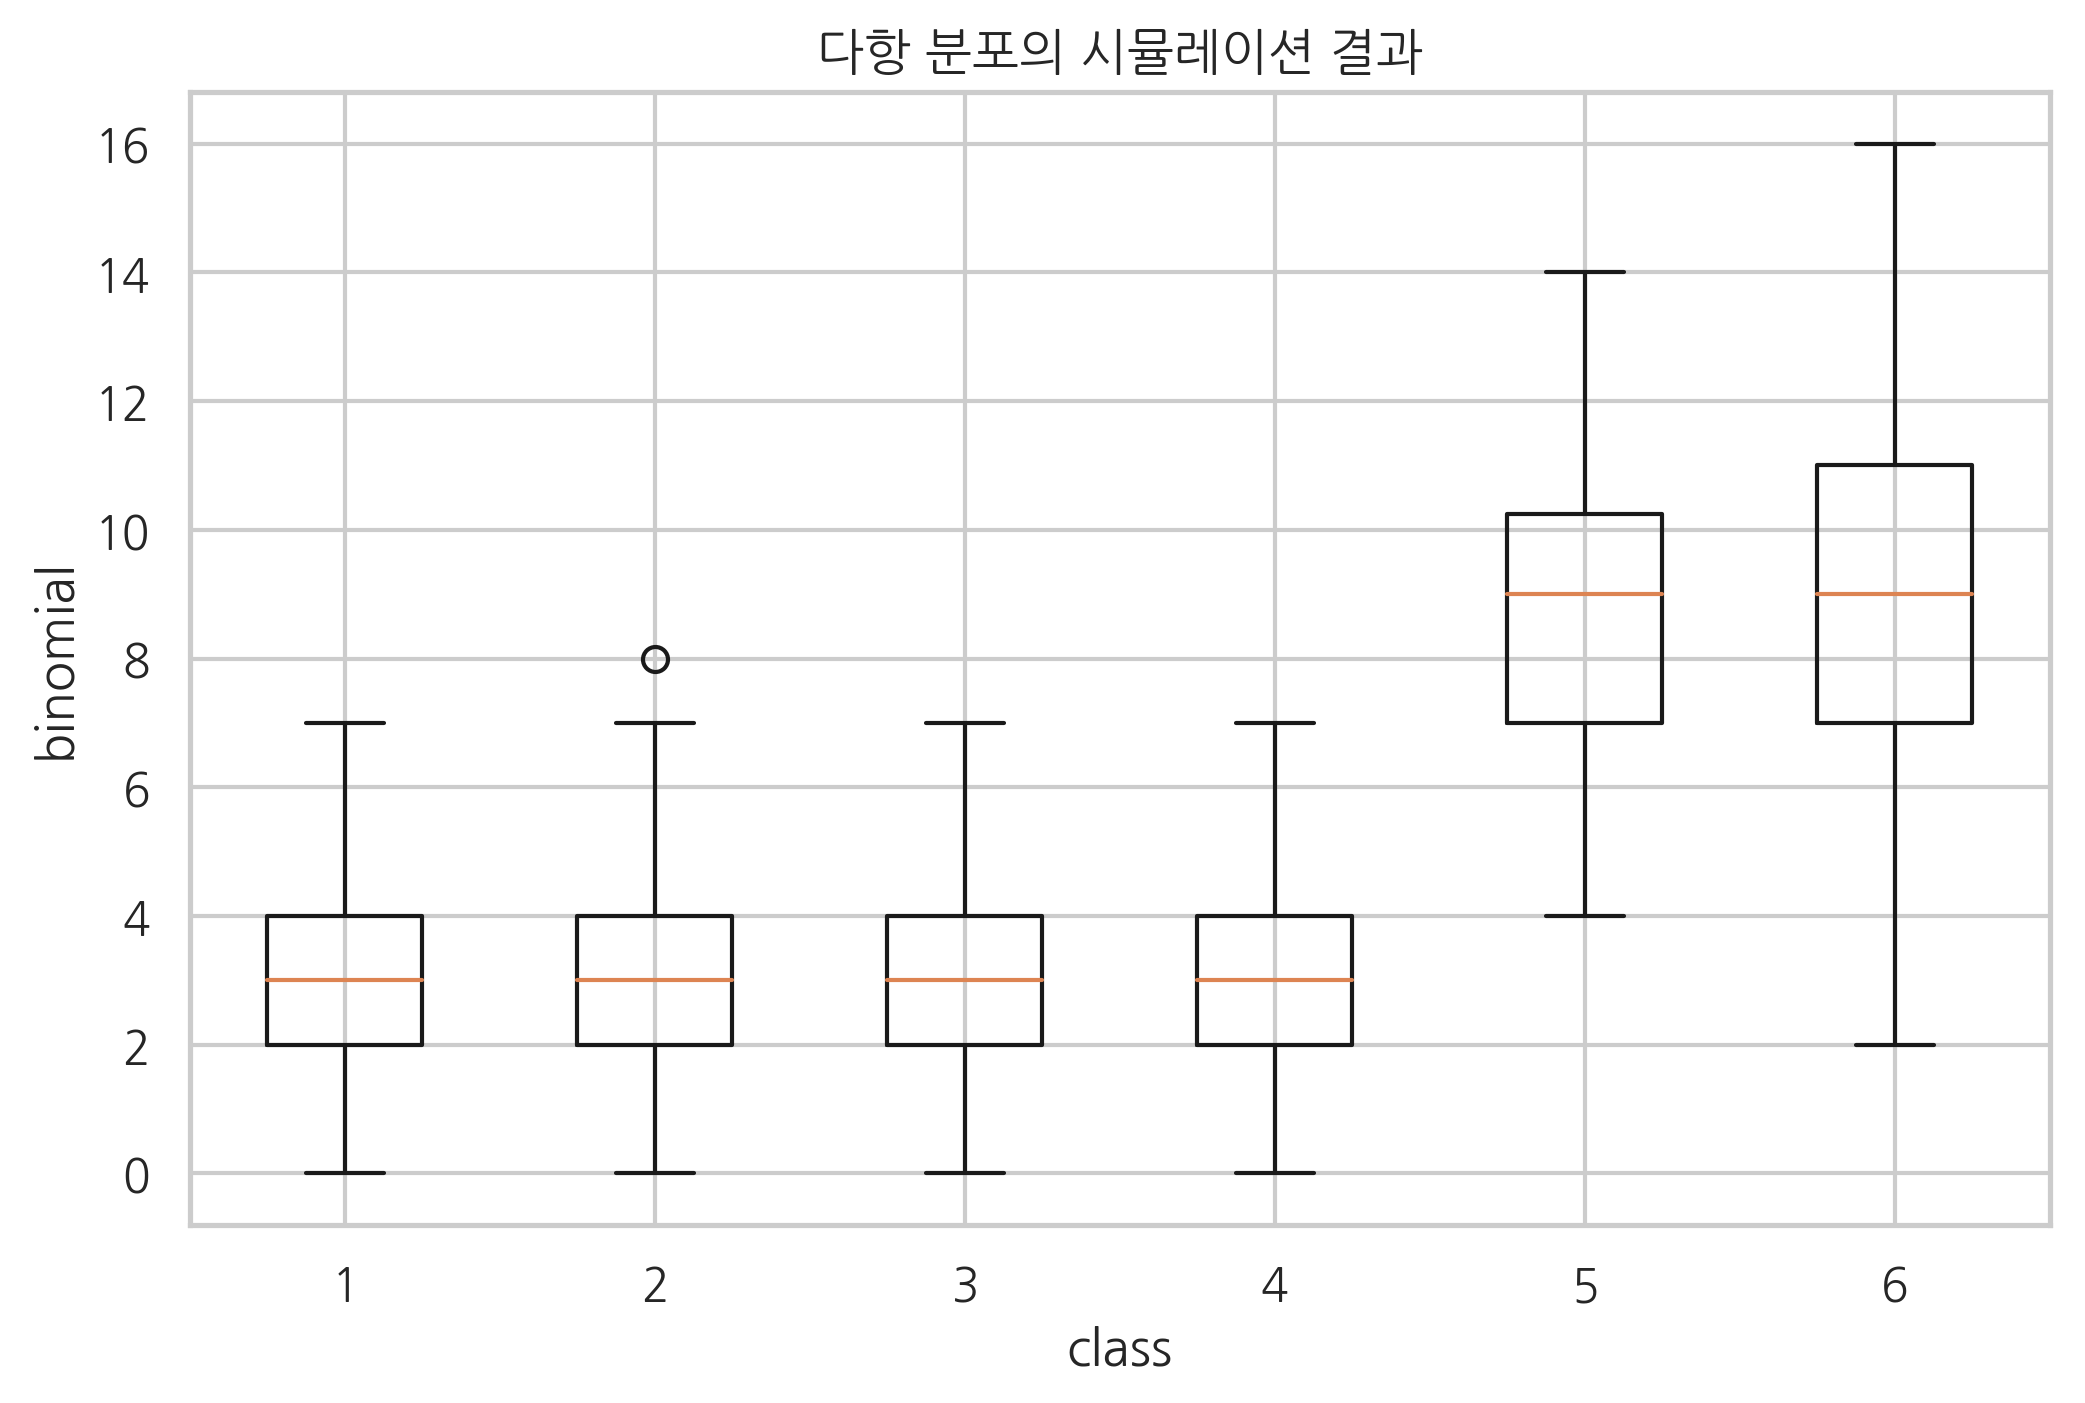

In [3]:
plt.boxplot(X)
plt.title("다항 분포의 시뮬레이션 결과")
plt.xlabel("class")
plt.ylabel("binomial")
plt.show()

seaborn 패키지를 사용하면 보다 다양하게 시각화할 수 있다.

In [4]:
df = pd.DataFrame(X).stack().reset_index()
df.columns = ["trial", "class", "binomial"]

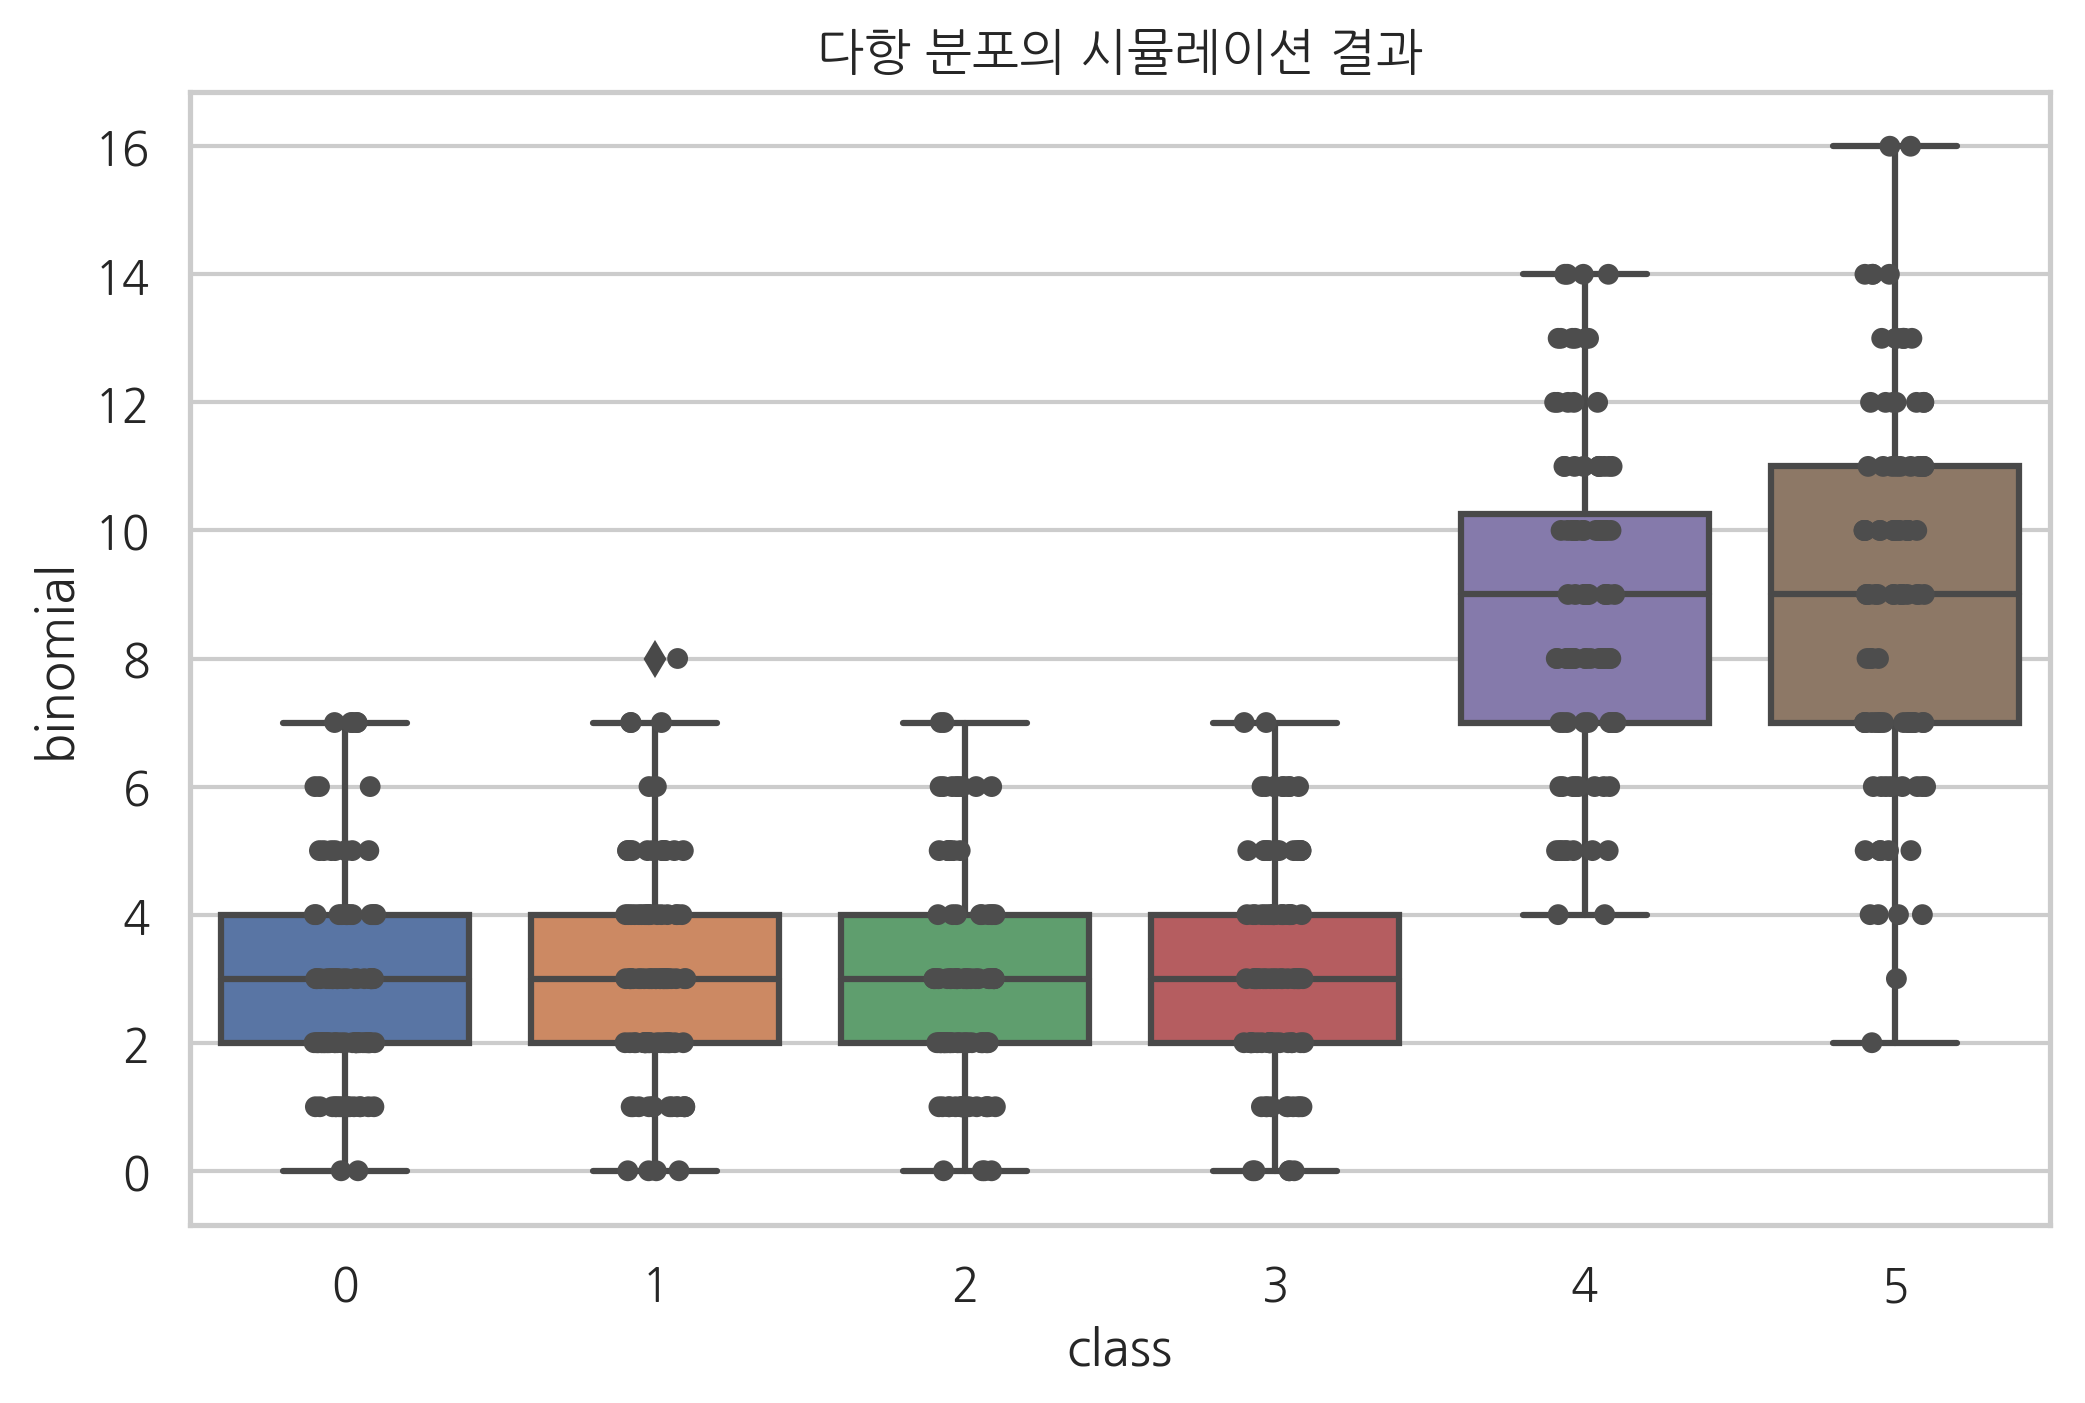

In [5]:
sns.boxplot(x="class", y="binomial", data=df)
sns.stripplot(x="class", y="binomial", data=df, jitter=True, color=".3")
plt.title("다항 분포의 시뮬레이션 결과")
plt.show()

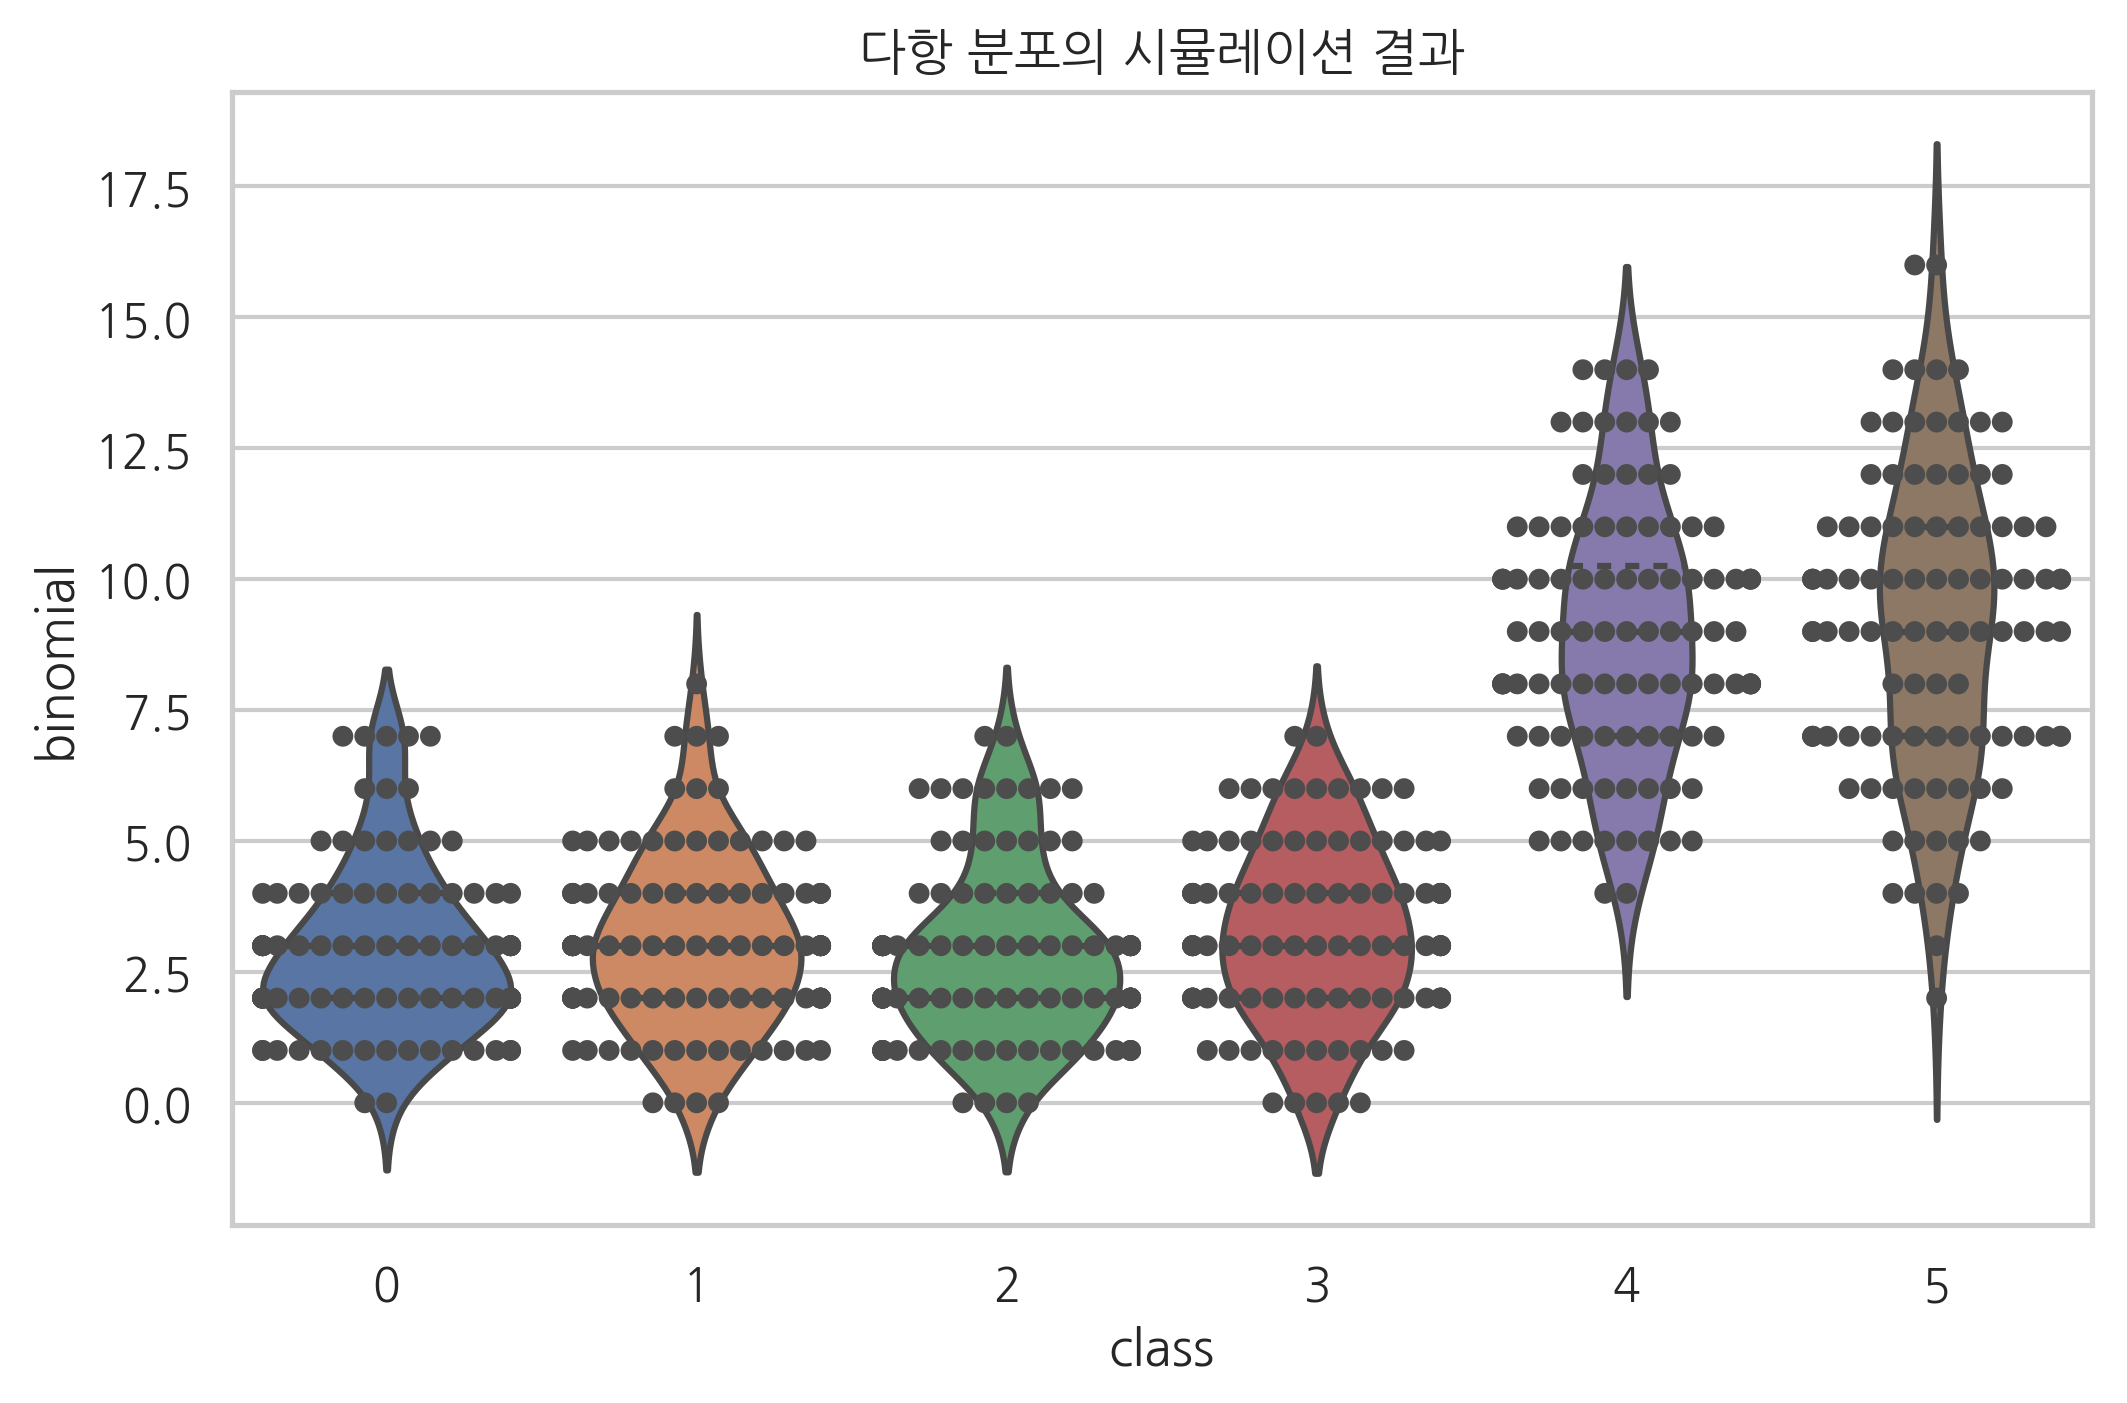

In [6]:
sns.violinplot(x="class", y="binomial", data=df, inner="quartile")
sns.swarmplot(x="class", y="binomial", data=df, color=".3")
plt.title("다항 분포의 시뮬레이션 결과")
plt.show()